In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [12]:
LABELED_PATH = '/Users/maedeh/Desktop/demand_project/shoofer-demand-prediction/data/labels.parquet'

In [13]:
labeled_df = pd.read_parquet(LABELED_PATH)
print(labeled_df.shape)
labeled_df.head()

(31440, 3)


,Location,Date,Demand
0,1,2023-01-01,40.0
1,1,2023-01-02,31.0
2,1,2023-01-03,27.0
3,1,2023-01-04,7.0
4,1,2023-01-05,15.0


In [14]:
def plot_cumsum_demand(labeled_df, target_demand):
    grouped_df = labeled_df.groupby('Location')['Demand'].sum().reset_index().sort_values(by='Demand', ascending=False).reset_index(drop=True)
    cumulative_demand = (grouped_df['Demand'].cumsum() / grouped_df['Demand'].sum()).to_numpy()
    
    plt.plot(range(1,263), cumulative_demand)
    plt.xlabel('Location numbers')
    plt.ylabel('Cumulative Demand')
    plt.title('Cumulative Demand by Location')
    target_x = (cumulative_demand <= target_demand).argmin()
    plt.axhline(y=target_demand, color='r', linestyle='--', label=f'Target Demand ({target_demand})')
    plt.axvline(x=target_x, color='g', linestyle='--', label=f'Target Location ({target_x})')
    
    plt.legend() 
    plt.show()
    important_locations = grouped_df.iloc[:target_x, grouped_df.columns.get_loc('Location')]
    important_locations = important_locations.to_numpy()
    return important_locations

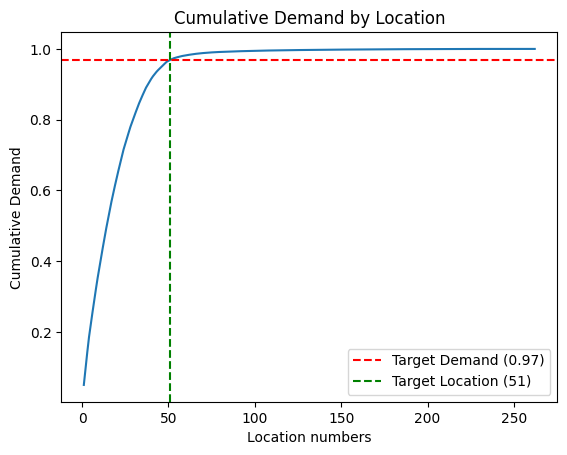

In [15]:
important_locations = plot_cumsum_demand(labeled_df, 0.97)

In [16]:
def plot_cumsum_demand_LocationId(labeled_df, target_demand):
    grouped_df = labeled_df.groupby('Location')['Demand'].sum().reset_index().sort_values(by='Demand', ascending=False).reset_index(drop=True)
    cumulative_demand = (grouped_df['Demand'].cumsum() / grouped_df['Demand'].sum()).to_numpy()
    
    fig = plt.figure(figsize=(50,10))
    ax1 = fig.add_subplot(111)
    ax1.plot(range(1,len(cumulative_demand)+1), cumulative_demand)
    ax1.set_xticks(range(1,263), grouped_df['Location'], rotation=90)
    ax1.set_xlabel('LocationID', fontsize=20)
    ax1.autoscale(enable=True, axis='x', tight=True)
    
    
    x = np.arange(0, len(cumulative_demand)+1, 50)
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(x, x, rotation=90, fontsize=20)
    ax2.set_xlabel('Location numbers', fontsize=20)
    ax2.set_ylabel('Cumulative Demand', fontsize=25)
    ax2.set_title('Cumulative Demand by Location', fontsize=27)
    ax1.tick_params(axis='both', labelsize=13)
    
    
    target_x = (cumulative_demand <= target_demand).argmin()
    plt.axhline(y=target_demand, color='r', linestyle='--', label=f'Target Demand ({target_demand})')
    plt.axvline(x=target_x, color='g', linestyle='--', label=f'Target LocationID <-({grouped_df.Location[target_x-1]})')
    
    
    plt.legend(loc='lower right', fontsize = '20') 
    plt.show()
    return grouped_df

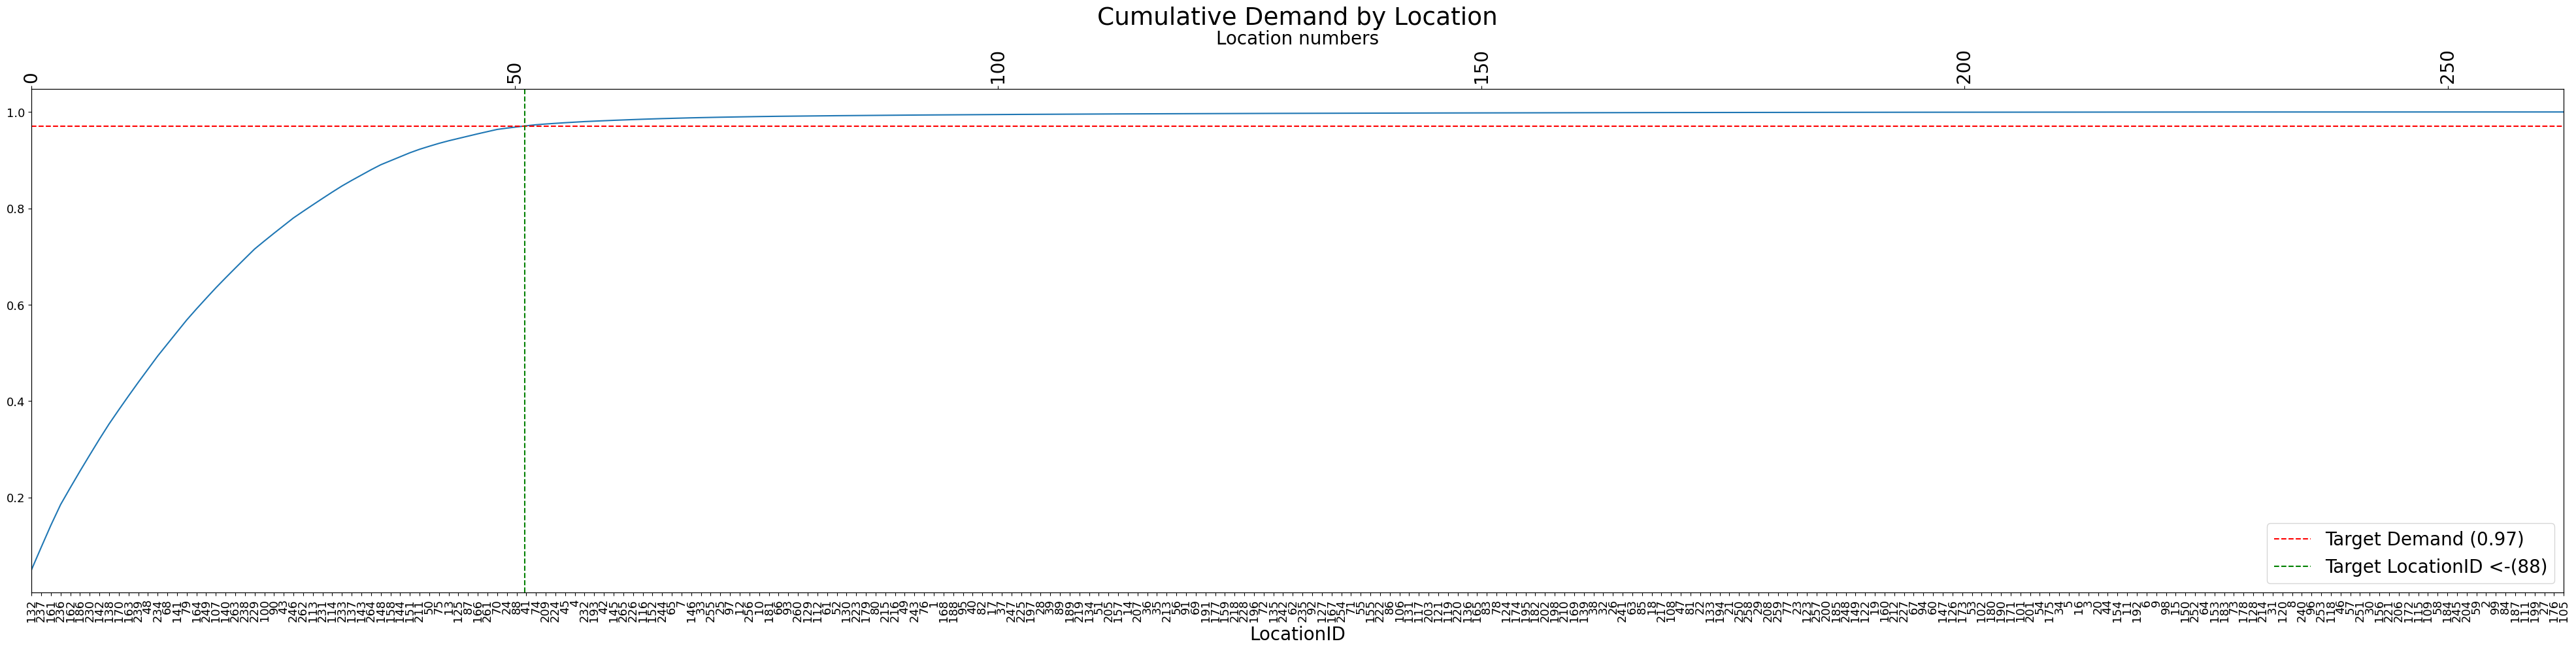

,Location,Demand
45,87,61281.0
46,166,60522.0
47,261,58104.0
48,70,57564.0
49,24,34187.0
50,88,31376.0
51,41,30307.0
52,74,26746.0
53,209,20148.0
54,224,17246.0


In [17]:
sort_demand_loc = plot_cumsum_demand_LocationId(labeled_df, 0.97)
sort_demand_loc[45:55]

As we see, There is huge gap between LocationID24 and LocationID70 but for sure we choose LocationIDs which their sum of demands are more than LocationID41


In [18]:
print(f'important_locations: {important_locations}')

important_locations: [132 237 161 236 162 186 230 142 138 170 163 239  48 234  68 141  79 164
 249 107 140 263 238 229 100  90  43 246 262 113 231 114 233 137 143 264
 148 158 144 151 211  50  75  13 125  87 166 261  70  24  88]


In [19]:
def zero_demand_location(labeled_df):
    
    ind_low_demand_loc = labeled_df.groupby('Location')['Demand'].min()==0
    low_demand_location = ind_low_demand_loc[ind_low_demand_loc==True].index
    number_low_demand_location = len(low_demand_location)+3
    percentage_low_demand_location = number_low_demand_location*100/265
    
    print(f'number of locations that have at least one zero demand: {number_low_demand_location}')
    print(f'percentage of locations that have at least one zero demand: {percentage_low_demand_location}')

    low_demand = {}
    zero_demand_loc = [i for i in range(1,266) if i not in labeled_df.Location.values]
    low_demand['zero_demand_location'] = list(low_demand_location) + zero_demand_loc
    low_demand['total_demand'] = [labeled_df.Demand[labeled_df.Location==i].sum() for i in low_demand_location] + [0,0,0]
    low_demand = pd.DataFrame(low_demand).sort_values(by='total_demand', ascending=False).reset_index(drop=True)
    
    return low_demand

In [20]:
low_demand = zero_demand_location(labeled_df)
low_demand.head()

number of locations that have at least one zero demand: 140
percentage of locations that have at least one zero demand: 52.83018867924528


,zero_demand_location,total_demand
0,51,1086.0
1,207,975.0
2,36,953.0
3,191,852.0
4,218,823.0
